In [33]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers.core import Activation
from keras.layers import Flatten
from keras.layers import Dense
from keras.utils import np_utils
from keras.optimizers import SGD , RMSprop , Adam
import numpy as np
import matplotlib.pyplot as plt

In [50]:
#定义ConvNet
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        # CONV => RELU => POOL
        model.add(Conv2D(20 , kernel_size = 5 , padding = "same" , input_shape = input_shape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size = (2,2) , strides = (2,2)))
        #CONV => RELU => POOL
        model.add(Conv2D(50 , kernel_size = 5 , padding = "same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size = (2,2) , strides = (2,2)))
        # Flatten层到RELU层
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))
        # softmax分类器
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        return model

In [76]:
#网络和训练
NB_EPOCH=2
BATCH_SIZE =128
VERBOSE =1
NB_CLASSES=10
OPTIMIZER=Adam()
VALIDATION_SPLIT=0.2#训练集用于验证的划分比例
DROPOUT = 0.3
IMG_ROWS , IMG_COLS = 28 , 28
INPUT_SHAPE = (1 , IMG_ROWS , IMG_COLS)

In [77]:
def load_mnist():
    path = r'F:\1.ZHANGHAN\DATA\mnist.npz' #放置mnist.py的目录。注意斜杠
    f = np.load(path)
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']
    f.close()
    return (x_train, y_train), (x_test, y_test)

In [78]:
#混合并划分训练集和测试集数据
(X_train,y_train),(X_test,y_test) = load_mnist()
K.set_image_data_format('channels_first')
K.image_data_format();

In [79]:
#把他们看成float类型并归一化
X_train =X_train.astype('float32')
X_test =X_test.astype('float32')
X_train/=255
X_test/=255

In [80]:
#我们需要使用形状 60k*[1*28*28]作为卷积网络的输入
X_train = X_train[:np.newaxis,:,:]
X_test = X_test[:np.newaxis,:,:]

#***修改的地方，3维张量变成4维
X_train = X_train.reshape(60000,1,28, 28)
X_test = X_test.reshape(10000,1,28, 28)

print(X_train.shape[1],'train samples')
print(X_test.shape[1],'test samples')

1 train samples
1 test samples


In [81]:
#将类向量转换为二值类别矩阵
Y_train=np_utils.to_categorical(y_train, NB_CLASSES)
Y_test=np_utils.to_categorical(y_test, NB_CLASSES)

In [82]:
#初始化优化器和模型
model = LeNet.build(input_shape = INPUT_SHAPE , classes = NB_CLASSES)
model.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])
history=model.fit(X_train,Y_train,
batch_size=BATCH_SIZE,epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score=model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test loss：", score[0])
print('Test accuracy：', score[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 110s 2ms/step - loss: 0.1852 - accuracy: 0.9429 - val_loss: 0.0613 - val_accuracy: 0.9810
Epoch 2/2
10000/10000 [==============================] - 6s 631us/step
Test loss： 0.0347650300876936
Test accuracy： 0.988099992275238


In [84]:
#列出全部历史数据
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


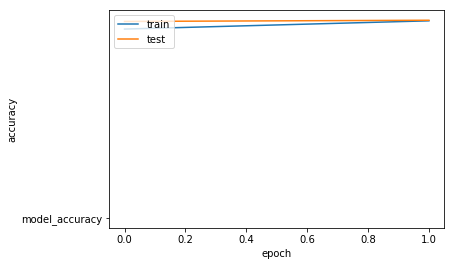

In [87]:
#汇总准确率历史数据
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

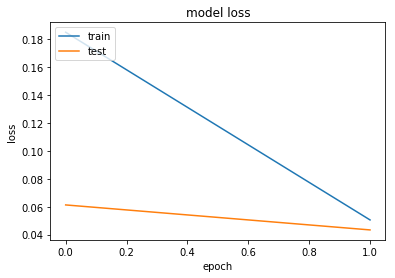

In [91]:
#汇总损失函数历史数据
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
#两个隐层 训练集准确率0.9448 验证集的准确率0.9458 测试集的准确率0.9469
#一个隐层 训练集准确率0.9314 验证集的准确率0.9334 测试集的准确率0.9343
#三个隐层 训练集准确率0.9526 验证集的准确率0.9528 测试集的准确率0.9495